The Lotka Volterra System
=========================

\begin{equation}
    \begin{aligned}
    \frac{d[X]}{dt} &= \alpha \cdot X - \beta \cdot X \cdot Y\\
    \frac{d[Y]}{dt} &= - \gamma \cdot Y + \delta \cdot X \cdot Y\\
    \end{aligned}
\end{equation}

where:

\begin{equation}
    \begin{aligned}
    X_0 = 1\\
    Y_0 = 1
    \end{aligned}
\end{equation}

and 

\begin{equation}
    \begin{aligned}
        \alpha &= 1.5 \\
        \beta  &= 1 \\
        \gamma &= 3 \\
        \delta &=  1 \\
    \end{aligned}
\end{equation}

In [1]:
import site
site.addsitedir(r'C:\Users\Ciaran\Documents\pycotools')
from pycotools import model, viz, tasks
import os

cps_file = r'C:\Users\Ciaran\Documents\pycotools\docs\source\Examples\LotkaVolterra.cps'
if os.path.isfile(cps_file):
    os.remove(cps_file)

with model.Build(cps_file) as m:
    m.name = 'LotkaVolterra'
    
    ## If not already present X and Y will be automatically added at concentration of 1 model unit
    m.add('reaction', name='X', expression='-> X ; Y', rate_law='alpha*X - beta*X*Y', parameter_values={'alpha': 1.5, 'beta':1})
    m.add('reaction', name='Y', expression='-> Y ; X', rate_law='-gamma*Y + delta*X*Y', parameter_values={'gamma': 3, 'delta':1})


lotka = model.Model(cps_file)

TC = tasks.TimeCourse(
    lotka, end=100, intervals=0.0001*100, step_size=0.0001
)

C:\Users\Ciaran\Documents\pycotools\pycotools\viz.py:117: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from the pandas.io.parser instead
  from pandas.parser import CParserError


root:INFO:25:    Initializing pycotools
root:INFO:26:    Initializing logging System
root:INFO:27:    logging config file at: C:\Users\Ciaran\Documents\pycotools\pycotools\logging_config.conf


#  Visualization

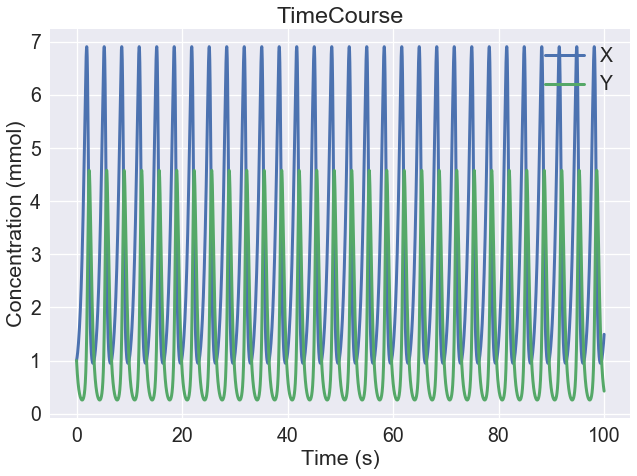

In [2]:
viz.PlotTimeCourse(
    TC, show=True, separate=False
)

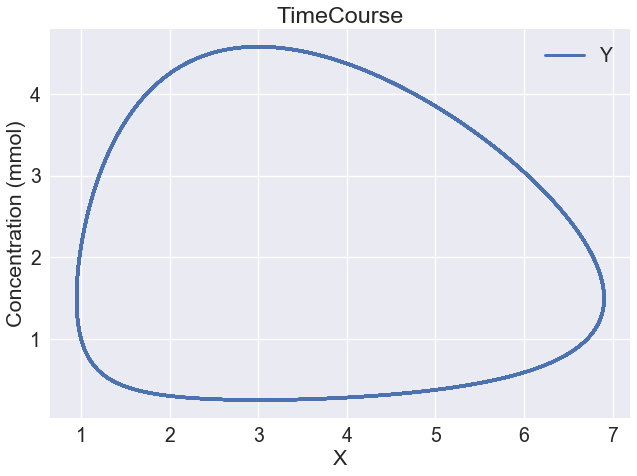

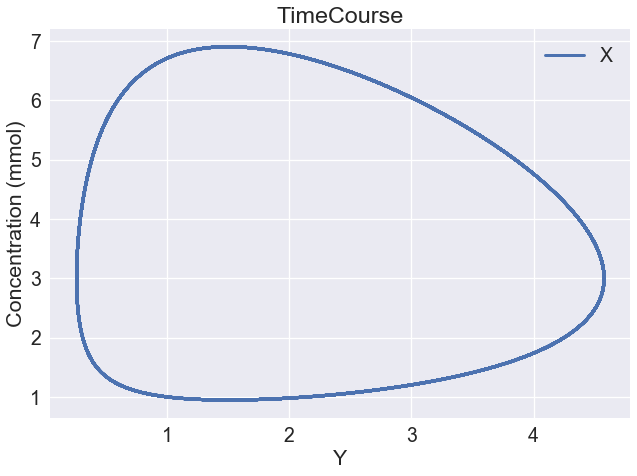

In [3]:
viz.PlotTimeCourse(
    TC, show=True, separate=True, x='X', y='Y'
)
viz.PlotTimeCourse(
    TC, show=True, separate=True, x='Y', y='X'
)